Vi börjar med att skapa ett spelar objekt

In [8]:
from fortnite_api import player
p = player.FortnitePlayer("ninja")

Nu kan vi se vad för egenskaper detta objekt har

In [9]:
print p.score
print p.matches
print p.wins
print p.kills
print p.name

5054383
13023
4794
91671
ninja


Låt oss läsa in lite fler spelar namn från en text fil och ladda dem från en server. Vi kan bara skapa ett nytt objekt varannan sekund för att inte överhetta servern.

In [10]:
from time import sleep
player_names = []
players = []
for line in open("players-ht2018.txt").readlines():
    name = line.strip()
    print "Adding player " + name
    player_names.append(name)
    players.append(player.FortnitePlayer(name))
    sleep(2)

Adding player TTV.Uwatakashi
Adding player Ninja
Adding player Twitch-Ettnix
Adding player E11 BlooTea
Adding player WBG Ranger
Adding player COOLER eXzacT
Adding player QUASAR Luanzera
Adding player Svennoss
Adding player 睏三小睏貴桃戈母災87
Adding player Youtube.Uniq
Adding player MiTH_Chambers
Adding player Dark
Adding player JohnPitterTV
Adding player Fnatic_Jαrl
Adding player ItsWiKKiD


Och sen kan vi räkna ut lite statistik, t.ex. vad är medelvärdet på vinster

In [11]:
summa = 0
for player in players:
    summa = summa + player.wins
medel = summa / float(len(players))
print "Medelvärdet = " + str(medel)

Medelvärdet = 4166.4


Och sen kan vi räkna på vilka spelare som är bättre än medelvärdet

In [12]:
for player in players:
    print "%-20s %6d"%(player.name, player.wins - medel)

TTV.Uwatakashi          716
Ninja                   627
Twitch-Ettnix           191
E11 BlooTea             177
WBG Ranger              164
COOLER eXzacT            96
QUASAR Luanzera           7
Svennoss                -19
睏三小睏貴桃戈母災87    -52
Youtube.Uniq           -106
MiTH_Chambers          -170
Dark                   -259
JohnPitterTV           -401
Fnatic_Jαrl           -444
ItsWiKKiD              -528


Och till sist kan vi skapa en tjusig graf som visar lifetime score

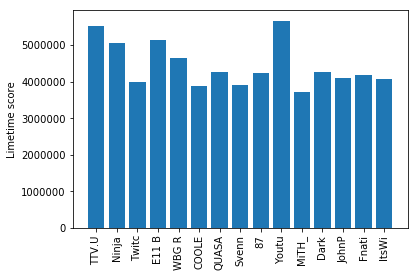

In [13]:
import matplotlib.pylab as plt
scores = [player.score for player in players]
player_names_short = [name[:5] for name in player_names]
player_names_short[8] = "87"
plt.bar(range(len(players)), scores, tick_label=player_names_short)
plt.xticks(rotation='vertical')
plt.ylabel("Limetime score")
plt.show()